In [265]:
import pickle
from glob import glob

In [444]:
from os.path import join

base_path = '/media/martin/External Drive/projects/lrvb_paper/coverage_redone/M_64'

coverage_runs = glob(join(base_path, '*', '*.pkl'))
model_names = [x.split('/')[-2] for x in coverage_runs]

In [445]:
import pandas as pd

In [446]:
df = pd.DataFrame({'filename': coverage_runs, 'model_name': model_names})

In [447]:
example = df.iloc[6]

example

filename      /media/martin/External Drive/projects/lrvb_pap...
model_name                                             mesquite
Name: 6, dtype: object

In [448]:
from scipy.stats import norm

In [504]:
import numpy as np

def compute_z_scores(loaded):
    
    # Compute the z-scores
    z_scores = (loaded['means'] - loaded['reference_means']) / (loaded['reference_freq_sds']**2 + loaded['freq_sds']**2)

    # Make them an array
    z_array = np.stack(z_scores.values)
    
    return z_array

def evaluate_z_scores(z_array, crit_prob=0.025):

    z_crit = norm.ppf(crit_prob)
    within_interval = np.abs(z_array) < np.abs(z_crit)
    within_ratio = within_interval.mean()
    
    return within_ratio

In [505]:
df['loaded'] = df['filename'].apply(pd.read_pickle)

A bit of explanation here: the field "loaded" now contains the rerun information. The column "means" lists the means for each rerun. The column "reference_means" lists the means for the reference run whose confidence interval we wish to evalute. And the column "reference_freq_sds" contains the estimated frequentist standard deviations.

In [506]:
df.iloc[0]['loaded']

,means,seed,freq_sds,reference_means,reference_freq_sds,M
0,"[-0.08070296, 0.49906698, 0.93568885, 0.267728...",1000,"[0.03264115668152135, 0.029697416449204133, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
1,"[-0.15882166, 0.5450057, 0.95904624, 0.3347381...",1001,"[0.032189867095354395, 0.02845510745516297, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
2,"[-0.11083525, 0.5558902, 0.9037112, 0.3830938,...",1002,"[0.03141204615856864, 0.029133792873623932, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
3,"[-0.12556063, 0.54605377, 0.9746123, 0.296488,...",1003,"[0.03306349048272407, 0.029236420120237146, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
4,"[-0.07945452, 0.5547119, 0.93674976, 0.3296300...",1004,"[0.03319022068763891, 0.029074428680779075, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
...,...,...,...,...,...,...
95,"[-0.10772553, 0.5872315, 0.96091926, 0.3024740...",1095,"[0.03242372524772455, 0.029292259219063328, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
96,"[-0.18960363, 0.5255786, 0.8765363, 0.41351828...",1096,"[0.03233204259745417, 0.02934854842172443, 0.0...","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
97,"[-0.12761372, 0.5884116, 0.9492771, 0.3458933,...",1097,"[0.0322457874453696, 0.030679546839589882, 0.0...","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64
98,"[-0.10791598, 0.5363761, 0.9648056, 0.3911348,...",1098,"[0.03182553121198985, 0.028892649908319246, 0....","[-0.0839810831129588, 0.534357518402997, 0.991...","[0.030820279356075952, 0.02953948088503201, 0....",64


In [507]:
df['z_scores'] = df['loaded'].apply(compute_z_scores)

TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable sqrt method

In [508]:
df['frac_within'] = df['z_scores'].apply(evaluate_z_scores)

In [ ]:
df['M'] = df['loaded'].apply(lambda x: x['M'].iloc[0])

In [ ]:
# 95% should lie within.
df[['model_name', 'M', 'frac_within']].sort_values('frac_within')

<AxesSubplot:>

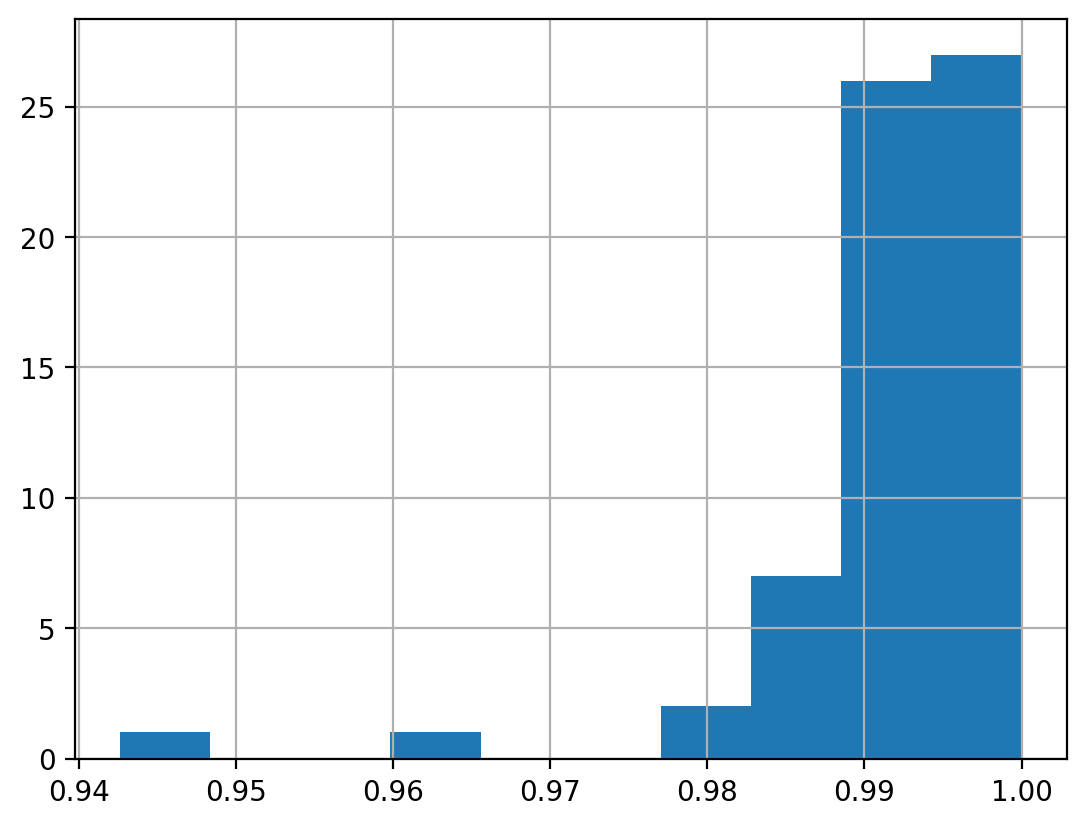

In [485]:
import matplotlib.pyplot as plt

df['frac_within'].hist()

In [486]:
df.iloc[0]['z_scores']

array([[ 0.05165533, -0.59575313, -0.85813   , ...,  0.25002494,
        -0.8430186 ,  0.81714916],
       [-1.1877543 ,  0.1836056 , -0.4912334 , ...,  0.3169753 ,
        -0.61164665,  0.3442141 ],
       [-0.4315147 ,  0.36699256, -1.335847  , ..., -0.05073324,
        -0.8658156 ,  0.5937415 ],
       ...,
       [-0.6918561 ,  0.8976246 , -0.65514123, ..., -0.5721952 ,
        -0.8162432 , -0.91147584],
       [-0.38206708,  0.03454556, -0.40887737, ..., -0.4643576 ,
        -1.558713  , -0.14916006],
       [-1.1663547 , -0.28461617, -0.36316633, ..., -0.6025616 ,
        -0.70083785,  0.4710313 ]], dtype=float32)

In [487]:
# Compute the "p-values"
df['p_vals'] = df['z_scores'].apply(norm.cdf)

In [488]:
all_p_vals = np.concatenate(df['p_vals'].apply(lambda x: x.reshape(-1)))

(array([11833., 23090., 28191., 30925., 31690., 30075., 27560., 22956.,
        16847.,  7633.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

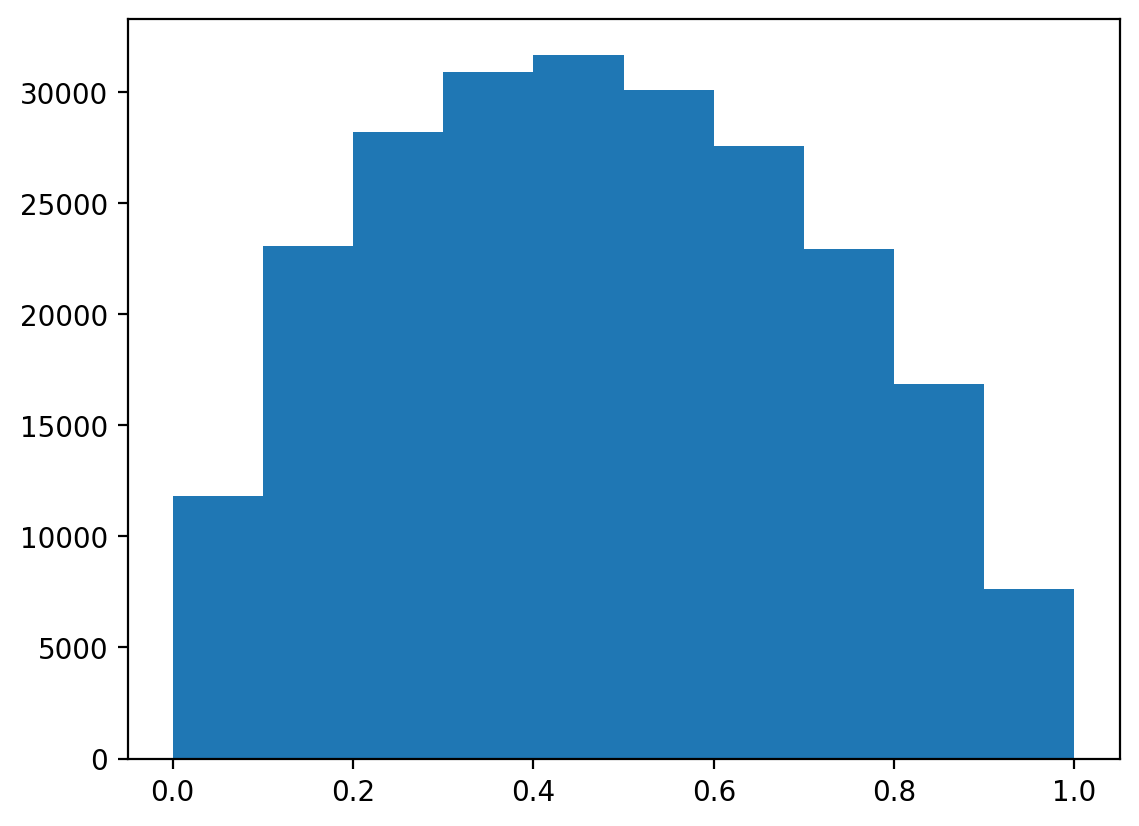

In [489]:
plt.hist(all_p_vals)

In [490]:
# Pick out some models of interest
model_to_check = 'microcredit'

model_p_vals = df[df['model_name'] == model_to_check]['p_vals'].iloc[0]
model_p_vals.shape

(100, 124)

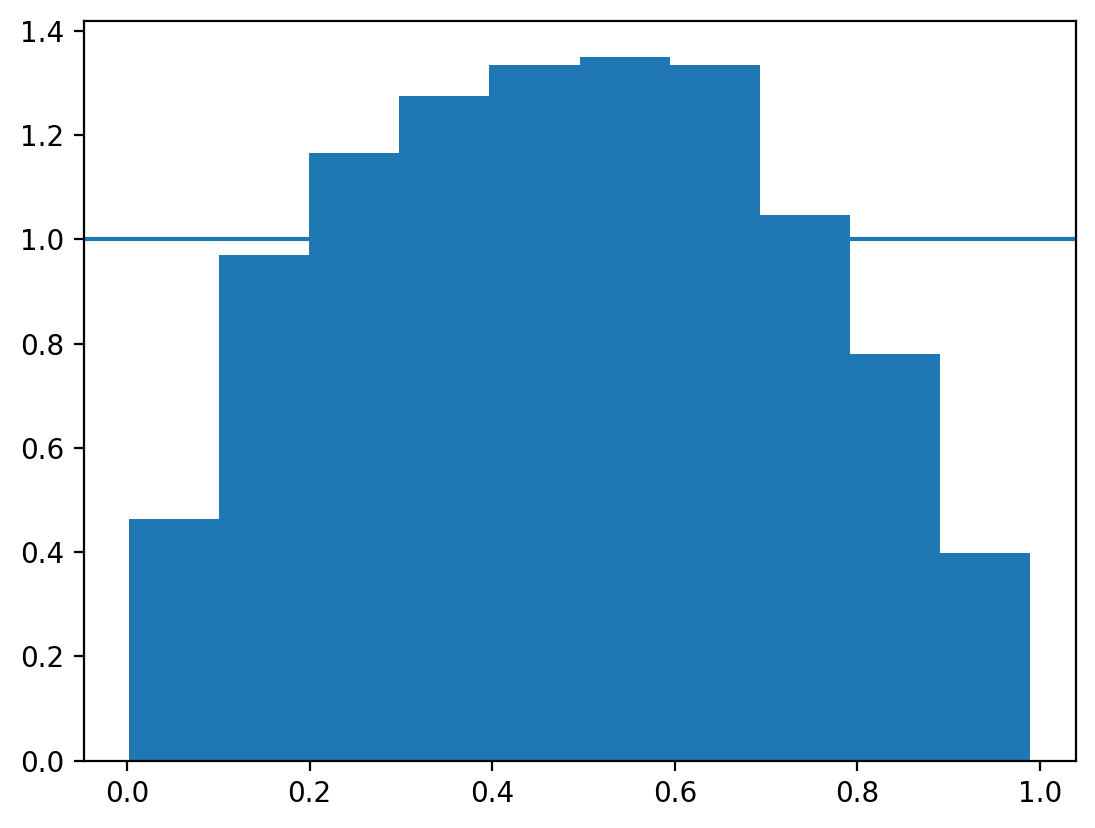

In [491]:
plt.hist(model_p_vals.reshape(-1), density=True)
plt.axhline(1.)

((array([-3.86345432, -3.64120686, -3.51932365, ...,  3.51932365,
          3.64120686,  3.86345432]),
  array([-4.1686926, -3.9515588, -3.5861702, ...,  3.4325218,  3.4954643,
          3.6836329], dtype=float32)),
 (1.0111448216759258, -0.07573549449443846, 0.9998243827488756))

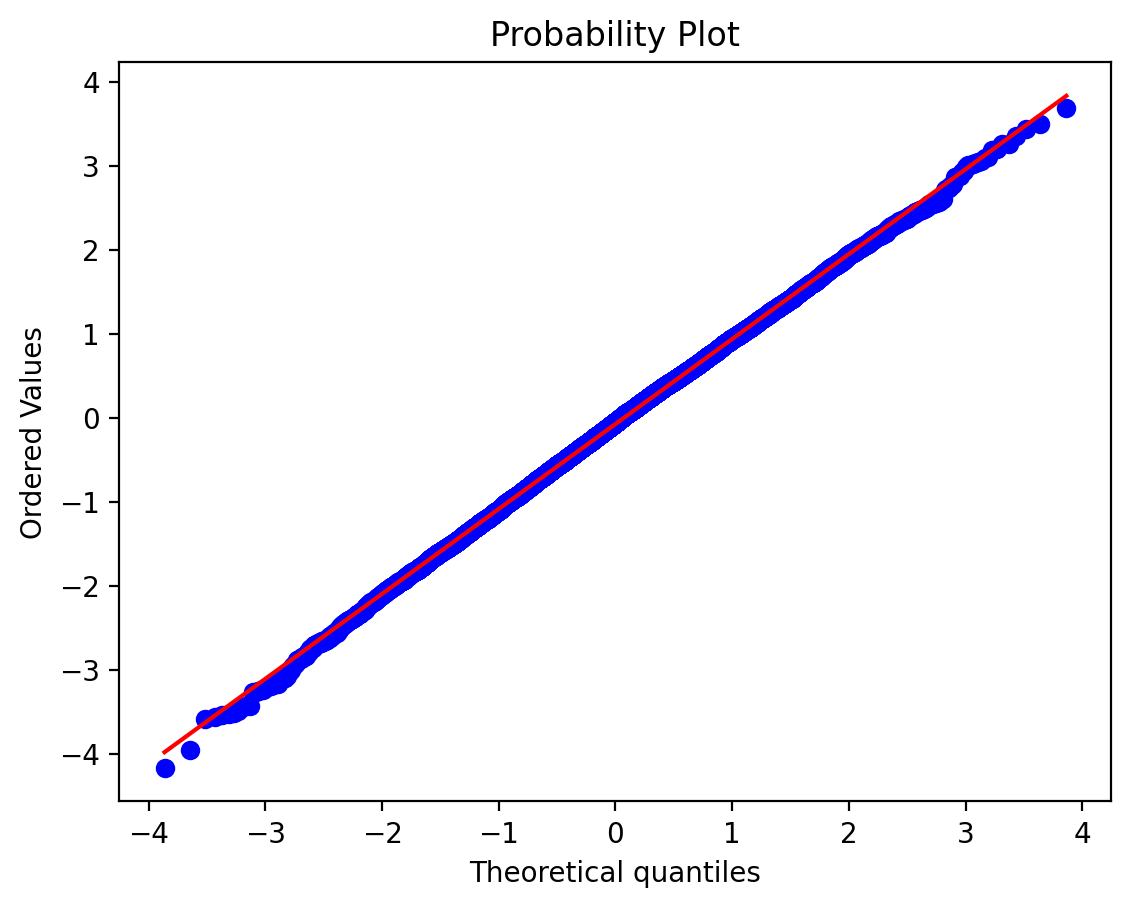

In [463]:
model_z_scores = df[df['model_name'] == model_to_check]['z_scores'].iloc[0].reshape(-1)


stats.probplot(model_z_scores, dist="norm", plot=plt)


In [464]:
import scipy.stats as stats

exclude_problematic = True

if exclude_problematic:
    problematic = ['earnings_latin_square', 'earn_height', 'occ_det']
else:
    problematic = []

flat_z_scores = np.concatenate(df[~df['model_name'].isin(problematic)]['z_scores'].apply(lambda x: x.reshape(-1)).values)

flat_z_scores.shape

(225900,)

In [465]:
~np.array([True, False])

array([False,  True])

In [466]:
all_p_vals = np.concatenate(
    df[~df['model_name'].isin(problematic)]['p_vals'].apply(
    lambda x: x.reshape(-1)).values)

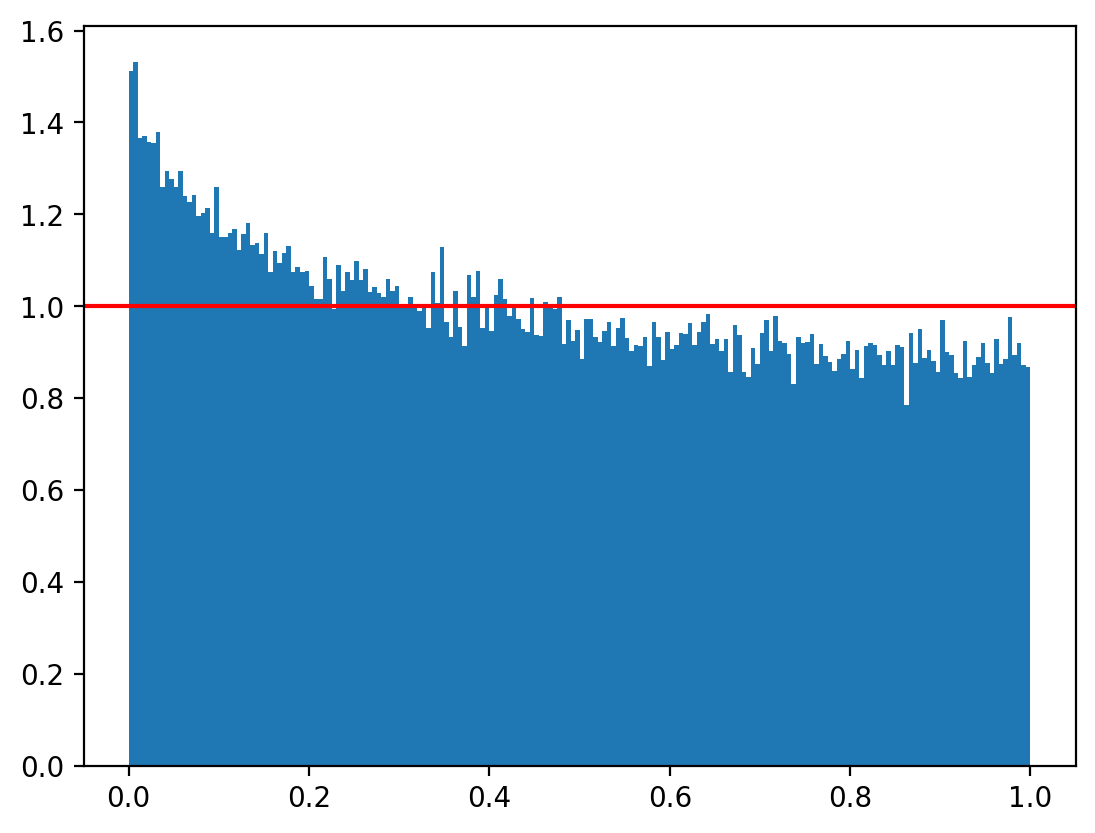

In [467]:
plt.hist(all_p_vals, density=True, bins=200)
plt.axhline(1, color='r')

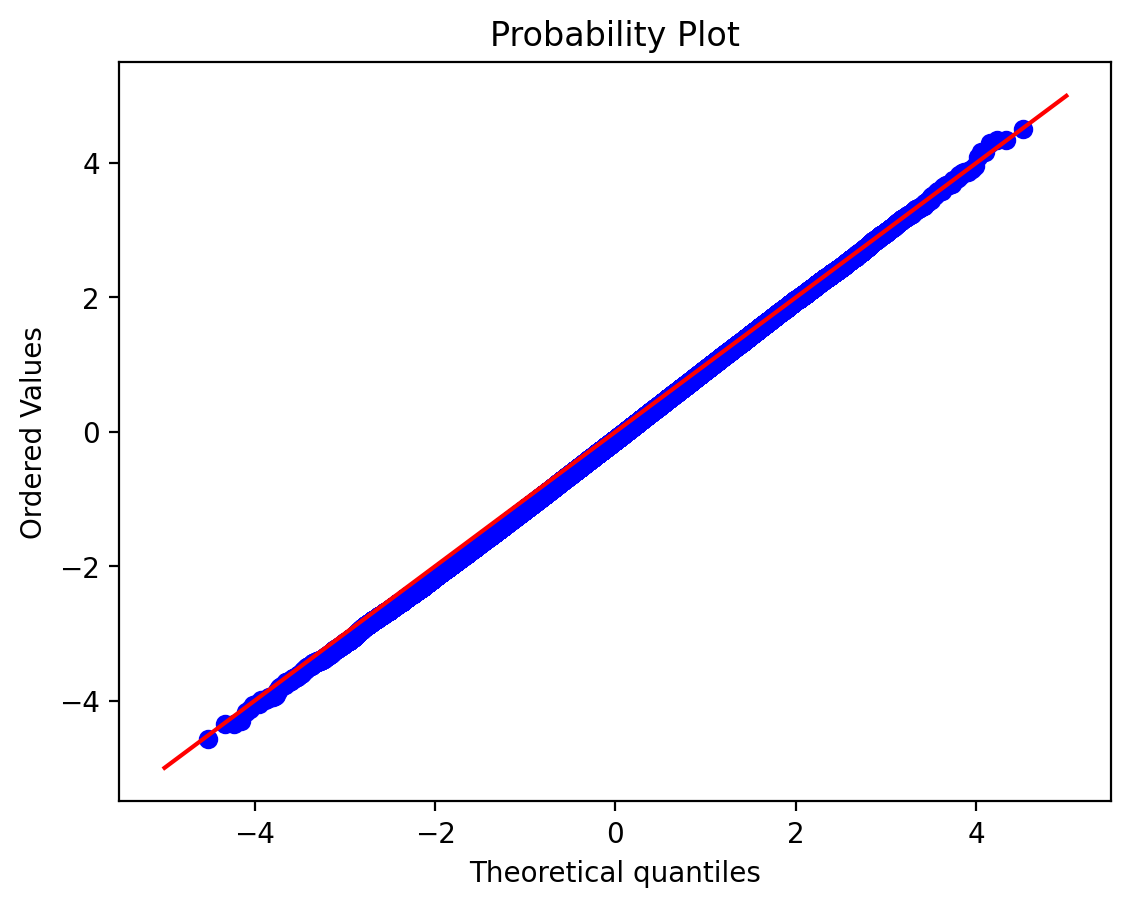

In [468]:
# All models:

stats.probplot(flat_z_scores, dist="norm", plot=plt, fit=False)
plt.plot([-5, 5], [-5, 5], color='r')

In [337]:
flat_z_scores.shape

(225900,)

(array([4.0000e+01, 5.9100e+02, 4.3560e+03, 1.6590e+04, 3.1389e+04,
        2.9248e+04, 1.4051e+04, 3.3530e+03, 3.6700e+02, 1.5000e+01]),
 array([0.33234673, 0.36643898, 0.40053124, 0.43462349, 0.46871575,
        0.502808  , 0.53690026, 0.57099251, 0.60508476, 0.63917702,
        0.67326927]),
 <BarContainer object of 10 artists>)

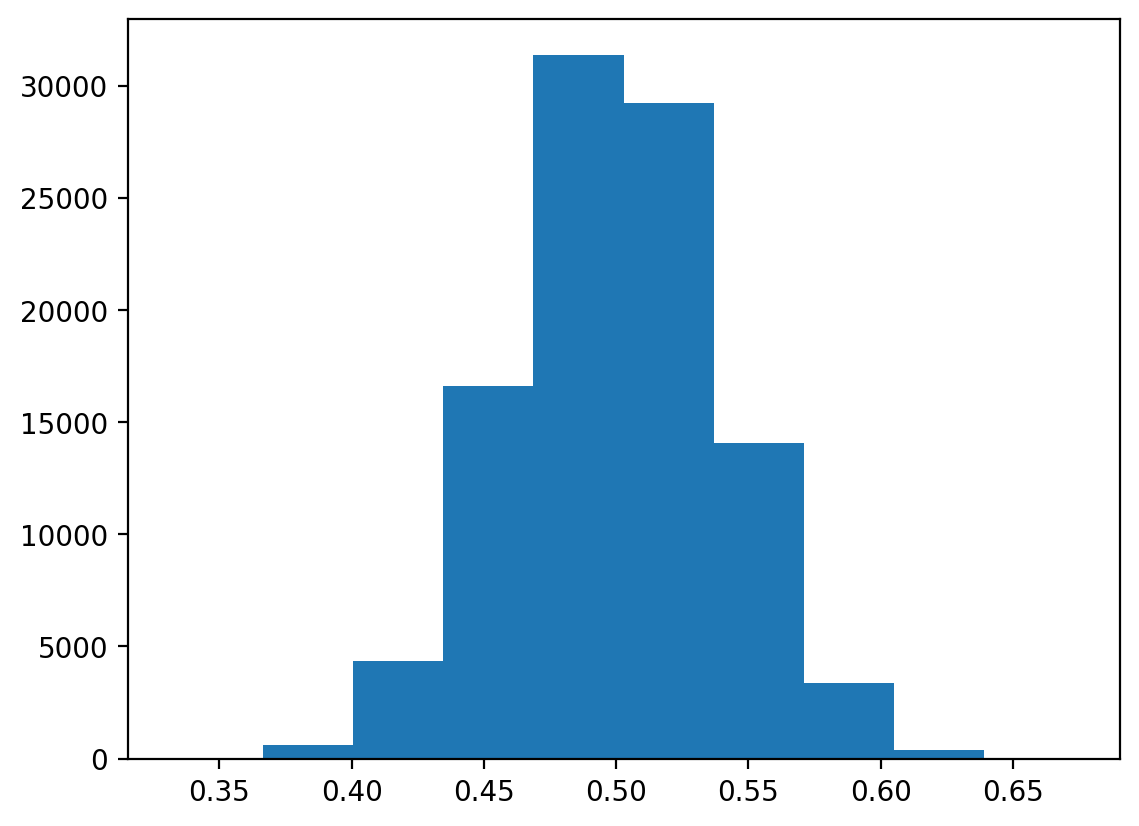

In [330]:
plt.hist(norm.cdf(norm.rvs(scale=.1, size=100000)))

(array([12004., 11192., 10567., 10207., 10082.,  9865.,  9614.,  9218.,
         8806.,  8445.]),
 array([5.49245862e-07, 1.00000247e-01, 1.99999945e-01, 2.99999643e-01,
        3.99999341e-01, 4.99999038e-01, 5.99998736e-01, 6.99998434e-01,
        7.99998132e-01, 8.99997830e-01, 9.99997527e-01]),
 <BarContainer object of 10 artists>)

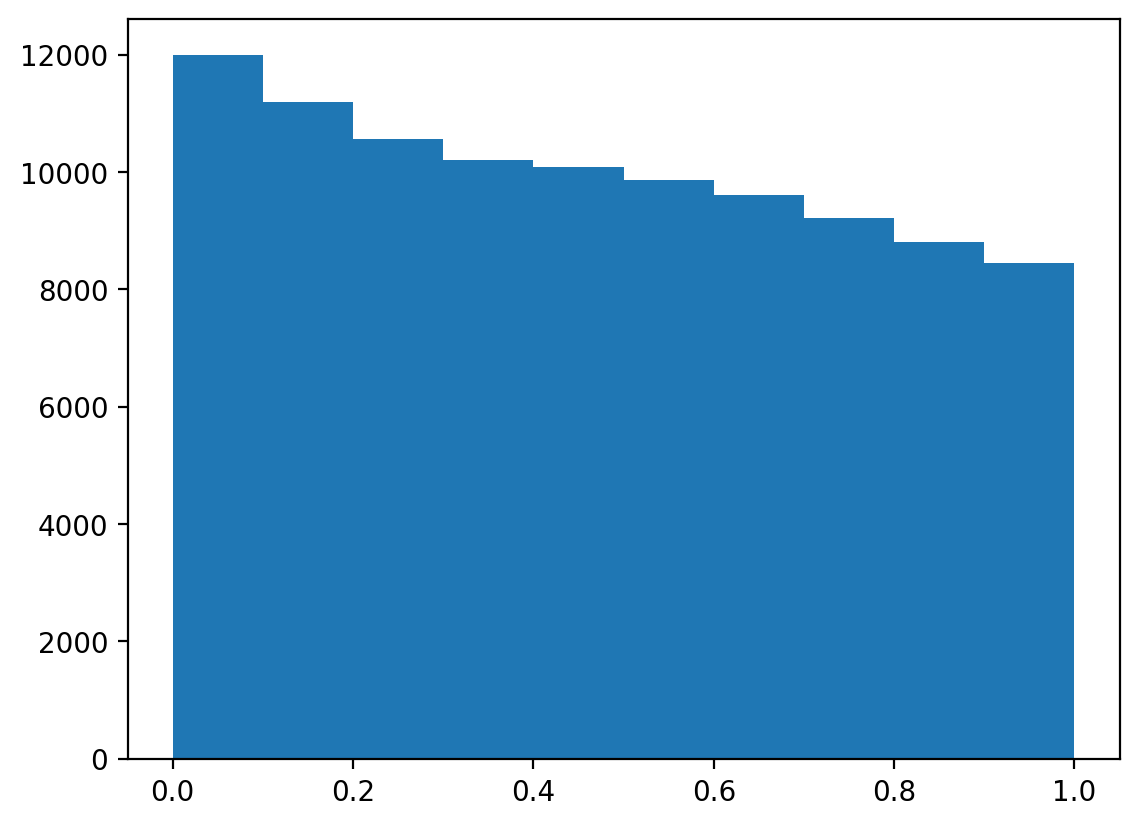

In [336]:
plt.hist(norm.cdf(norm.rvs(loc=-0.1, scale=1., size=100000)))

(array([44919.,  1778.,  1287.,  1073.,   995.,  1047.,  1076.,  1277.,
         1740., 44808.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

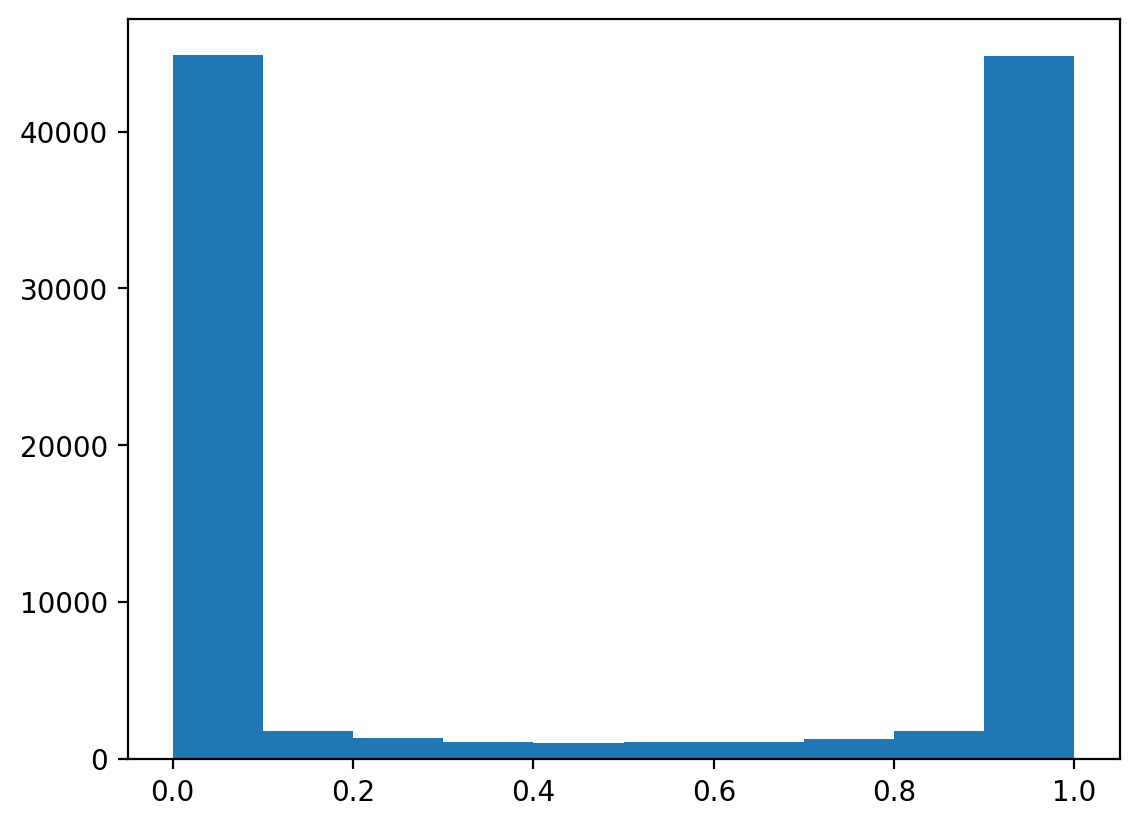

In [331]:
plt.hist(norm.cdf(norm.rvs(scale=10., size=100000)))

In [293]:
flat_z_scores.min()

-4.563593

In [294]:
df['min_z_score'] = df['z_scores'].apply(lambda x: x.min())

In [295]:
df.sort_values('min_z_score').head(10)

,filename,model_name,loaded,z_scores,frac_within,M,p_vals,min_z_score
36,/media/martin/External Drive/projects/lrvb_pap...,earnings_latin_square,...,"[[0.98559403, 0.34292024, 0.46051654, -0.21449...",0.883696,64,"[[0.8378338166400962, 0.6341707690675087, 0.67...",-1176.123657
55,/media/martin/External Drive/projects/lrvb_pap...,earn_height,means seed \ ...,"[[-0.55838025, -0.3006231, 1.8150153], [0.6532...",0.913333,64,"[[0.28829237944320873, 0.38185096145435343, 0....",-200.966339
24,/media/martin/External Drive/projects/lrvb_pap...,election88_full,...,"[[0.9026937, 0.08631495, -0.82690173, -1.07331...",0.933659,64,"[[0.8166557565489498, 0.5343919713504541, 0.20...",-4.563593
34,/media/martin/External Drive/projects/lrvb_pap...,radon_group,...,"[[-0.39484292, -0.6117296, 0.2398256, 1.56587,...",0.924556,64,"[[0.34647940775314257, 0.27035833001397447, 0....",-4.342137
14,/media/martin/External Drive/projects/lrvb_pap...,radon_group_chr,...,"[[-0.39484292, -0.6117296, 0.2398256, 1.56587,...",0.924556,64,"[[0.34647940775314257, 0.27035833001397447, 0....",-4.342137
48,/media/martin/External Drive/projects/lrvb_pap...,electric_1c,...,"[[-0.95795923, -0.8961692, -0.85575473, -1.308...",0.957719,64,"[[0.16904165752803374, 0.18508120524214688, 0....",-4.300196
18,/media/martin/External Drive/projects/lrvb_pap...,microcredit,...,"[[-0.17585757, 0.15163773, -1.5884757, -0.1038...",0.946855,64,"[[0.43020291853225345, 0.560263664544659, 0.05...",-4.168693
15,/media/martin/External Drive/projects/lrvb_pap...,electric_1b,...,"[[0.1687651, -0.67072576, -0.7577773, -0.46051...",0.952574,64,"[[0.5670092938204291, 0.2511976237771604, 0.22...",-4.130188
42,/media/martin/External Drive/projects/lrvb_pap...,radon_vary_si,...,"[[0.8380634, -0.6972597, 0.5761213, 0.04177456...",0.950862,64,"[[0.799002456722143, 0.2428201342537719, 0.717...",-4.068459
7,/media/martin/External Drive/projects/lrvb_pap...,earnings_vary_si,...,"[[0.52084327, 2.046595, 0.23720278, -0.8808937...",0.953333,64,"[[0.6987620203856193, 0.9796510716496872, 0.59...",-3.968265


In [296]:
worst_one = df.sort_values('min_z_score').iloc[0]

In [297]:
worst_one['z_scores'].min(axis=1)

array([   -1.8534694,    -2.8496346,    -2.368211 ,    -2.393342 ,
       -1094.6375   ,    -2.395979 ,    -3.5916216,    -2.0841155,
          -2.4298837,    -2.1062024,    -1.864499 ,    -2.482779 ,
          -2.4140837,    -3.5573003, -1113.5814   ,    -2.7008932,
       -1117.7068   ,    -2.361369 ,    -2.4351435,    -2.7211738,
          -2.3725097,    -2.7228122,    -2.3020592,    -2.6053119,
       -1172.6053   ,    -2.5894105,    -2.4562492,    -2.67469  ,
          -2.4860466, -1176.1237   , -1005.7847   ,    -2.371162 ,
          -1.6427951,    -2.1018507,    -2.9716868,    -2.478481 ,
       -1054.1633   ,    -3.0635643,    -3.5248277,    -3.3107662,
          -2.6819816,    -2.5260193,    -1.9646344,    -1.788013 ,
       -1066.0872   ,    -3.0493655,    -2.472428 ,    -2.6096756,
          -2.6089935, -1049.4465   ,    -2.3114433,    -2.005303 ,
          -2.2419496,    -3.080511 ,    -2.5702822, -1030.624    ,
          -2.0715137,    -2.641279 , -1114.7461   ,    -2.7288

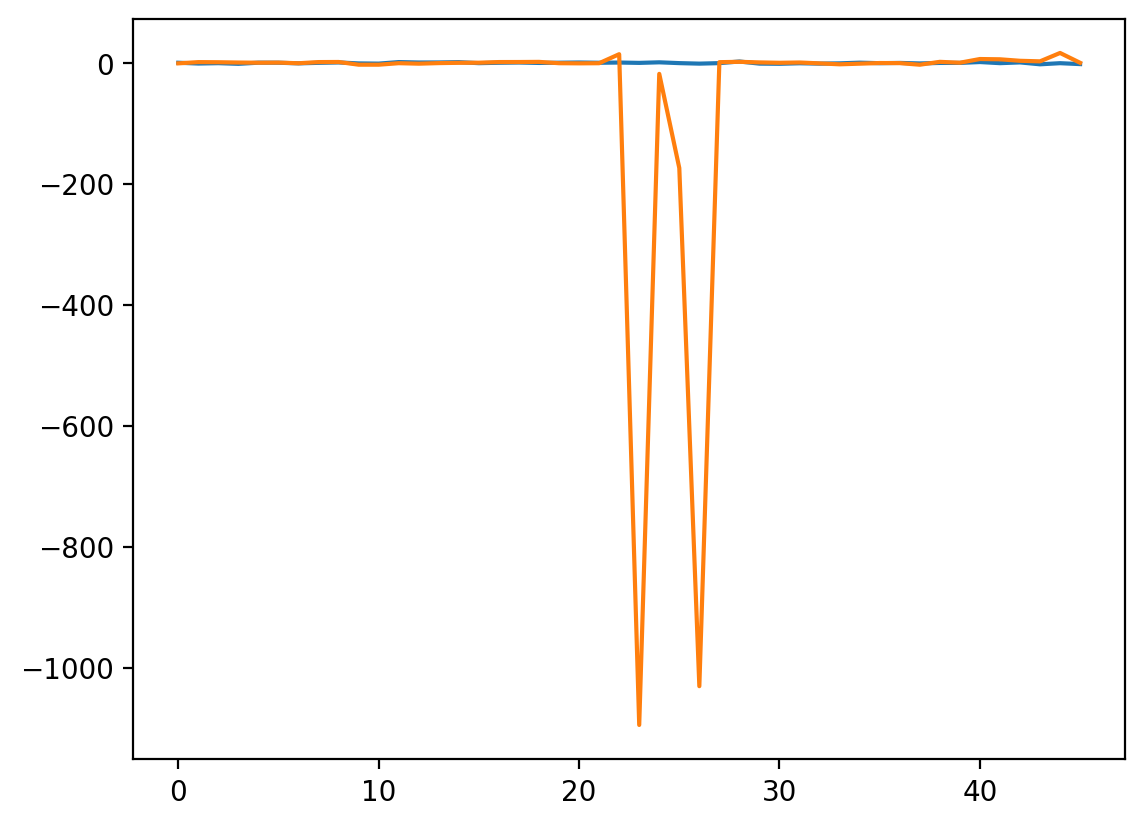

In [298]:
plt.plot(worst_one['z_scores'][3])
plt.plot(worst_one['z_scores'][4])

In [260]:
# Did that one have convergence issues maybe?
# I guess I should keep better track of that.